**We will try 3 types of models - **
1. BOW model
2. Word embeddings (GLOVE)
3. RNN

**Experiment 1 **

1. Mix all the paragraphs and split the data to a 80-20 split
2. Build the 3 models listed earlier and compute the confusion matrix for the training and testing datasets.
3. Discuss how your models perform.


In [5]:
import pandas as pd
import keras 
from keras.preprocessing.text import text_to_word_sequence
from keras.activations import relu
from keras.optimizers import adam, adadelta
from keras.layers import Dense, Dropout
from keras.preprocessing.sequence import pad_sequences
from nltk.tokenize import word_tokenize

** Bag of Words for feature extraction**

In [10]:
transcript = pd.read_csv('Earnings_Call_Transcript.csv')
transcript.drop(columns='Unnamed: 0', axis=1).head()

,sentiment,text
0,positive,thank good welcome conference call fourth quar...
1,positive,look past expect channel inventory correction ...
2,neutral,last question come line harlan sur jp
3,negative,china game slow economic environment governmen...
4,negative,know could tear tease know consumer market rel...


In [15]:
transcript['text'].describe()

count         1618
unique        1492
top       operator
freq            28
Name: text, dtype: object

In [16]:
transcript['sentiment'].describe()

count        1644
unique          3
top       neutral
freq          833
Name: sentiment, dtype: object

In [17]:
transcript['sentiment'].value_counts()

neutral     833
positive    654
negative    157
Name: sentiment, dtype: int64

In [19]:
tokens = text_to_word_sequence(transcript['text'][0])
tokens

['thank',
 'good',
 'welcome',
 'conference',
 'call',
 'fourth',
 'quarter',
 'fiscal',
 'call',
 'today',
 'nvidia',
 'president',
 'chief',
 'executive',
 'officer',
 'colette',
 'executive',
 'vice',
 'president',
 'chief',
 'financial',
 'like',
 'remind',
 'call',
 'webcast',
 'live',
 'investor',
 'relation',
 'web']

The bag-of-words model is a simplifying representation used in natural language processing and information retrieval (IR). In this model, a text (such as a sentence or a document) is represented as the bag (multiset) of its words, disregarding grammar and even word order but keeping multiplicity

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

bow = CountVectorizer(max_features=20000)
X = bow.fit_transform(transcript['text'].astype('str')).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y = le.fit_transform(transcript['sentiment'])
Y

array([2, 2, 1, ..., 1, 0, 1], dtype=int64)

Lets us start building our first model using Logistic Regression

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [33]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 0, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 0,
       1, 1, 2, 2, 2, 0, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2,
       2, 1, 2, 2, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2,
       2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 0,
       1, 2, 2, 2, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 0, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1,
       2, 1, 0, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 0, 1, 2, 1, 2, 1,
       2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1,

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

In [36]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.31      0.13      0.19        30
          1       0.70      0.78      0.74       172
          2       0.65      0.63      0.64       127

avg / total       0.64      0.67      0.65       329



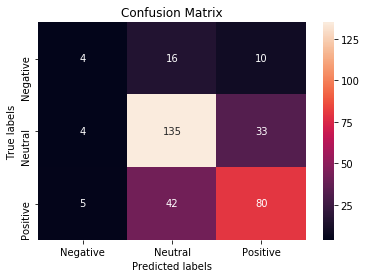

In [45]:
import matplotlib.pyplot as plt     
import seaborn as sns

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Negative','Neutral', 'Positive']); 
ax.yaxis.set_ticklabels(['Negative','Neutral', 'Positive']);

In [46]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.6656534954407295

In [47]:
params = {'C': [1, 10, 0.1, 100], 'penalty': ['l1', 'l2']}

In [48]:
grid_cv = GridSearchCV(estimator=model, param_grid=params, cv=10)
grid_cv.fit(x_train, y_train)


GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 10, 0.1, 100], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [49]:
grid_cv.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [50]:
y_pred = grid_cv.predict(x_test)

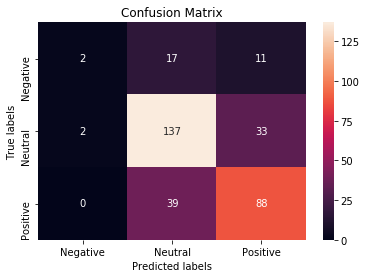

In [51]:
import matplotlib.pyplot as plt     
import seaborn as sns

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Negative','Neutral', 'Positive']); 
ax.yaxis.set_ticklabels(['Negative','Neutral', 'Positive']);

In [52]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.6899696048632219

In [53]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.50      0.07      0.12        30
          1       0.71      0.80      0.75       172
          2       0.67      0.69      0.68       127

avg / total       0.67      0.69      0.67       329



In [54]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [55]:
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.5258358662613982

XGBosst Classifier

In [73]:
from xgboost import XGBClassifier

model = XGBClassifier(max_depth=4, n_estimators=100)
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [74]:
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.6838905775075987

In [61]:
params = {'max_depth': [4, 8, 10, 20], 'n_estimators': [10, 50, 100, 200]}

In [63]:
#grid_cv = GridSearchCV(estimator=model, param_grid=params, cv=4)
#grid_cv.fit(x_train, y_train)


In [64]:
#y_pred = grid_cv.predict(x_test)

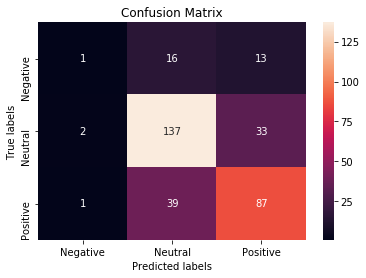

In [75]:
import matplotlib.pyplot as plt     
import seaborn as sns

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Negative','Neutral', 'Positive']); 
ax.yaxis.set_ticklabels(['Negative','Neutral', 'Positive']);

In [76]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.25      0.03      0.06        30
          1       0.71      0.80      0.75       172
          2       0.65      0.69      0.67       127

avg / total       0.65      0.68      0.66       329



** Neural Network **

In [91]:
y_train.shape

(1315,)

In [93]:
from keras.utils import to_categorical

y_train = keras.utils.to_categorical(y_train , num_classes=3).astype('float32')
y_test = keras.utils.to_categorical(y_test , num_classes=3).astype('float32')

In [95]:
y_train

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [114]:
from keras.models import Sequential

model = Sequential()

In [97]:
 x_train.shape[1]

3790

In [115]:
model.add(Dense(64, activation='relu',kernel_initializer='uniform', input_shape= (x_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(128, kernel_initializer='uniform',activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, kernel_initializer='uniform',activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(32, kernel_initializer='uniform',activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))

#model.compile(optimizer=adam(lr=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=adadelta(lr=0.00001, decay=1e-6), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 64)                242624    
_________________________________________________________________
dropout_26 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_27 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_28 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_41 (Dense)             (None, 32)                2080      
__________

In [116]:
history = model.fit(x_train, y_train, validation_split = 0.2, epochs=10, batch_size=2)

Train on 1052 samples, validate on 263 samples
Epoch 1/10
1052/1052 [==============================] - 5s 4ms/step - loss: 1.0983 - acc: 0.4021 - val_loss: 1.0984 - val_acc: 0.3992
Epoch 2/10
1052/1052 [==============================] - 4s 4ms/step - loss: 1.0983 - acc: 0.4059 - val_loss: 1.0984 - val_acc: 0.3992
Epoch 3/10
1052/1052 [==============================] - 4s 4ms/step - loss: 1.0984 - acc: 0.3954 - val_loss: 1.0984 - val_acc: 0.4030
Epoch 4/10
1052/1052 [==============================] - 4s 4ms/step - loss: 1.0984 - acc: 0.4135 - val_loss: 1.0984 - val_acc: 0.4030
Epoch 5/10
1052/1052 [==============================] - 4s 4ms/step - loss: 1.0983 - acc: 0.3973 - val_loss: 1.0984 - val_acc: 0.4030
Epoch 6/10
1052/1052 [==============================] - 5s 4ms/step - loss: 1.0984 - acc: 0.3888 - val_loss: 1.0984 - val_acc: 0.4030
Epoch 7/10
1052/1052 [==============================] - 4s 4ms/step - loss: 1.0983 - acc: 0.3878 - val_loss: 1.0984 - val_acc: 0.4030
Epoch 8/10
1052

In [122]:
model = Sequential()

model.add(Dense(64, activation='relu', input_shape= (x_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

#model.compile(optimizer=adam(lr=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=adam(lr=0.00001, decay=1e-6), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 64)                242624    
_________________________________________________________________
dropout_36 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_52 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_37 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_53 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_38 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_54 (Dense)             (None, 3)                 99        
Total para

In [123]:
history = model.fit(x_train, y_train, validation_split = 0.3, epochs=10, batch_size=5)

Train on 920 samples, validate on 395 samples
Epoch 1/10
920/920 [==============================] - 2s 3ms/step - loss: 1.0983 - acc: 0.3500 - val_loss: 1.0954 - val_acc: 0.4000
Epoch 2/10
920/920 [==============================] - 1s 1ms/step - loss: 1.0919 - acc: 0.4076 - val_loss: 1.0905 - val_acc: 0.4734
Epoch 3/10
920/920 [==============================] - 1s 1ms/step - loss: 1.0864 - acc: 0.4413 - val_loss: 1.0859 - val_acc: 0.5114
Epoch 4/10
920/920 [==============================] - 1s 1ms/step - loss: 1.0830 - acc: 0.4413 - val_loss: 1.0813 - val_acc: 0.5367
Epoch 5/10
920/920 [==============================] - 1s 1ms/step - loss: 1.0807 - acc: 0.4685 - val_loss: 1.0769 - val_acc: 0.5519
Epoch 6/10
920/920 [==============================] - 1s 1ms/step - loss: 1.0749 - acc: 0.4902 - val_loss: 1.0725 - val_acc: 0.5544
Epoch 7/10
920/920 [==============================] - 1s 1ms/step - loss: 1.0666 - acc: 0.5109 - val_loss: 1.0679 - val_acc: 0.5671
Epoch 8/10
920/920 [==========

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


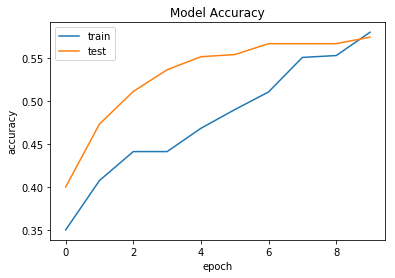

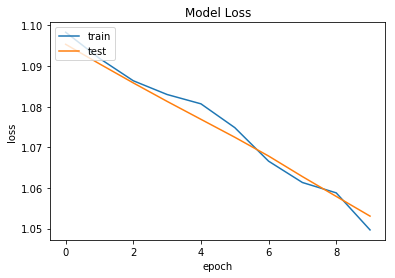

In [124]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [126]:
y_pred = model.predict(x_test)
y_pred

array([[0.3062495 , 0.3446439 , 0.3491066 ],
       [0.31130806, 0.3495342 , 0.33915773],
       [0.3109601 , 0.34887788, 0.340162  ],
       [0.3091911 , 0.35031623, 0.34049267],
       [0.2974338 , 0.3607651 , 0.3418011 ],
       [0.31075028, 0.34454566, 0.344704  ],
       [0.2985966 , 0.3421069 , 0.3592965 ],
       [0.28966558, 0.3422539 , 0.3680806 ],
       [0.31057987, 0.3483405 , 0.34107965],
       [0.28830755, 0.3587491 , 0.35294333],
       [0.28821537, 0.34940332, 0.36238137],
       [0.27774265, 0.3492593 , 0.37299812],
       [0.2941603 , 0.34983188, 0.35600784],
       [0.30253163, 0.348921  , 0.34854737],
       [0.31302813, 0.3489856 , 0.33798626],
       [0.3026403 , 0.34164962, 0.35571012],
       [0.3227305 , 0.34500593, 0.3322636 ],
       [0.31342667, 0.35191068, 0.3346627 ],
       [0.3113746 , 0.34169427, 0.34693113],
       [0.29504716, 0.35481715, 0.35013565],
       [0.31046277, 0.3514156 , 0.3381216 ],
       [0.29395267, 0.3711602 , 0.33488712],
       [0.

In [127]:
y_pred = model.predict_classes(x_test)
y_pred

array([2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1,
       2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2,
       2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1,
       2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2,

In [129]:
print(classification_report(y_test.argmax(axis=1), y_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        30
          1       0.64      0.74      0.69       172
          2       0.52      0.53      0.52       127

avg / total       0.54      0.59      0.56       329



C:\Users\nikhi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[]

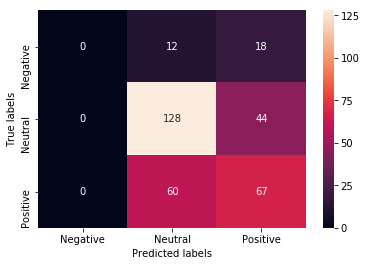

In [131]:
import matplotlib.pyplot as plt     
import seaborn as sns


import seaborn as sns
labels = ['Negative','Neutral', 'Positive']
ax = sns.heatmap(confusion_matrix(y_test.argmax(axis=1), y_pred), annot=True, xticklabels=labels, yticklabels=labels, fmt='g')
ax.set(xlabel='Predicted labels', ylabel='True labels')
ax.plot()


**Out of these, XGBoost gave the best Accuracy of 68.3% ** 

Lets try now different Feature Extraction techniques like Tf-Idf , Word Embedding, pre trained Word embeddings 